In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cwd_split = os.getcwd().split('/')

if cwd_split[-1] == "ai":
    higher_level_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    os.chdir(higher_level_dir)
    print(f"changed to {higher_level_dir}")
elif cwd_split[-2] == "ai":
    higher_level_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
    os.chdir(higher_level_dir)
    print(f"changed to {higher_level_dir}")

print(os.getcwd())


/home/mrks/linux-Documents/efficientIO


In [6]:
from datetime import datetime, timedelta, time
import pandas as pd

from ai.utils.http_utils import fetch_data_from_http, append_data_to_dataframe_http
import os

projects = [
'638f6103-9d59-4c70-88ad-30aab513c47d',
'c31751ab-0ec6-434d-bdd4-ec062325205f',
'562a358b-9af8-4176-9baa-7b1562d8e524',
'4d0c34f6-242f-4ce1-92bd-2a764b070941',
'ef351b6e-8cb7-43ed-9945-e3881a3cf228',
'0bd2836e-ee9c-4130-8903-5450f0f5540d' # Anker Bahnhofcity
]


v = 'prgEM.lr_RealPower_Grid'
# opening times (read from project settings)
# closing times (read from project settings)
# mocked
t_open = time(3,0)
t_closing = time(20,00)

# “bake window” timeframe (numeric input field, in minutes)
bake_window = 180

In [7]:
def get_load_periods(open_period_df: pd.DataFrame, open_period_mean: float):
    backing_periods = []
    start = None

    for index, row in open_period_df.iterrows():
        if row["Rolling Max"] > open_period_mean:
            if start is None:
                start = row.name
        elif not start is None:
            backing_periods.append((start, row.name))
            start = None
    return backing_periods

In [17]:
import numpy as np
from sklearn.cluster import KMeans

def get_tresholds(df):
    # Generate some example data
    data = df[v].dropna().values.reshape(-1,1)
    # Define the number of clusters (in this case, 2)
    num_clusters = 3

    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)

    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_

    # Sort the centroids
    centroids_sorted = np.sort(centroids, axis=0)

    # The threshold will be the midpoint between the two centroids
    threshold = [(centroids_sorted[0] + centroids_sorted[1]) / 2,
                (centroids_sorted[1] + centroids_sorted[2]) / 2]


    print("Threshold:", threshold)
    return threshold


In [18]:
def plot_backing_monitoring(operation_start, operation_stop, load_periods):
    import matplotlib.pyplot as plt

    # Plot the DataFrame
    plt.figure(figsize=(10, 6))

    # Plot DataFrame as a scatter plot
    plt.plot(df, label='DataFrame')

    # Plot the float value as a horizontal line
    plt.axhline(y=operating_mean, color='g', linestyle='-')
    plt.axhline(y=operating_mean_roll, color='r', linestyle='--')

    plt.axhline(y=closed_hours_max, color='g', linestyle='-')
    plt.axhline(y=closed_hours_mean, color='r', linestyle='-')
    plt.axhline(y=th1, color='g', linestyle='--')


    #plt.axhline(y=operating_min_roll, color='b', linestyle='--')
    #plt.axhline(y=operating_max_roll, color='y', linestyle='--')



    plt.axvspan(operation_start, operation_stop, color='lightgray')

    for item in load_periods:
        plt.axvspan(item[0], item[1], color='yellow')



    # Show the plot
    plt.grid(False)
    plt.show()

In [19]:
def analyze_load_monitoring():
    plt.figure(figsize=(10, 10))

    plt.subplot(411)
    df["Rolling Mean"].plot()
    
    plt.subplot(412)
    plt.plot(np.gradient(df["Rolling Mean"].values))

    plt.subplot(413)
    st = np.sort(df["Rolling Mean"].values)
    st_grad = np.gradient(st)
    plt.plot(st)
    plt.plot(st_grad*10)

    plt.subplot(414)
    _ = plt.hist(st, bins=30)  # arguments are passed to np.histogram
    plt.show()

ANAYLISIS FOR PROJECT: 638f6103-9d59-4c70-88ad-30aab513c47d


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.8377178]), array([10.41113487])]


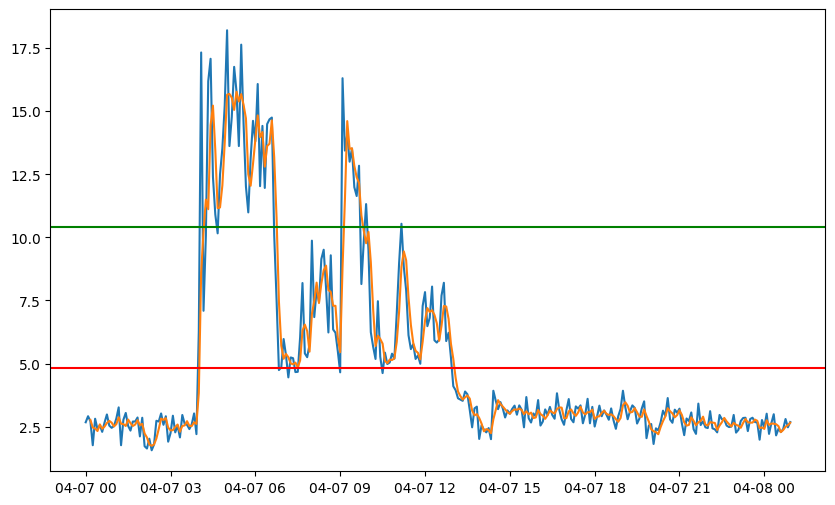

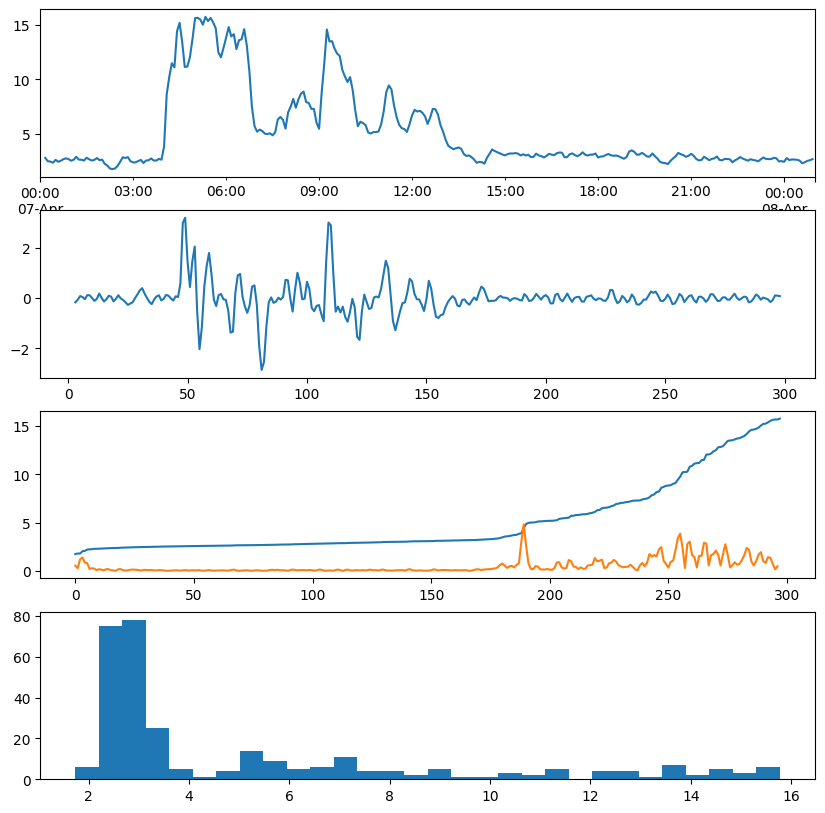

ANAYLISIS FOR PROJECT: c31751ab-0ec6-434d-bdd4-ec062325205f


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.1459482]), array([9.20949744])]


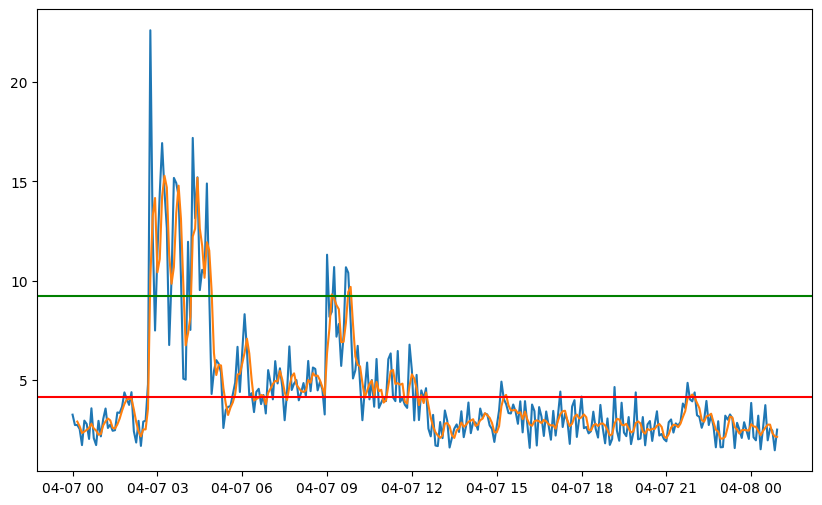

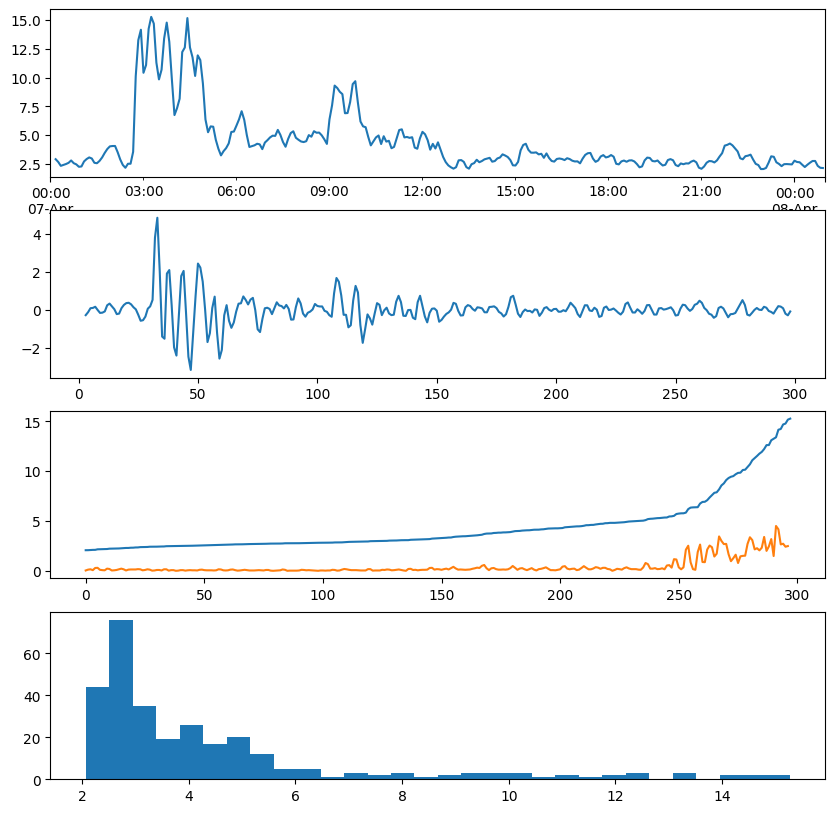

ANAYLISIS FOR PROJECT: 562a358b-9af8-4176-9baa-7b1562d8e524
Threshold: [array([20.20763327]), array([31.84245988])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


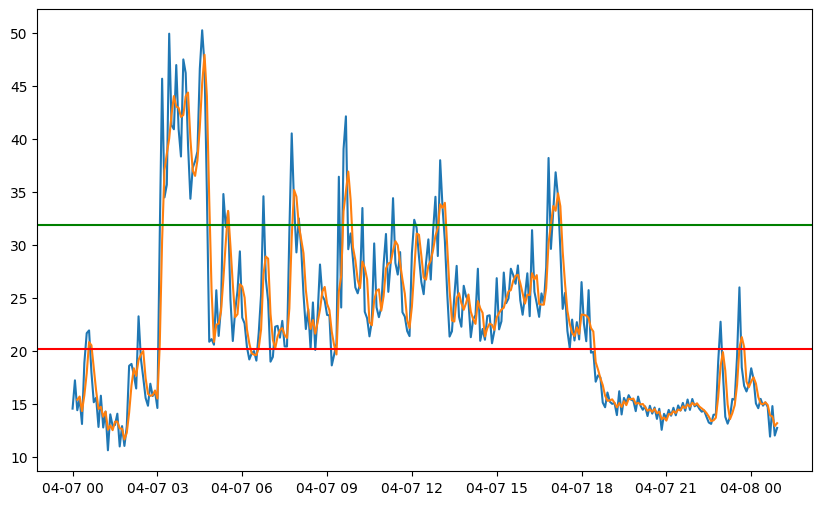

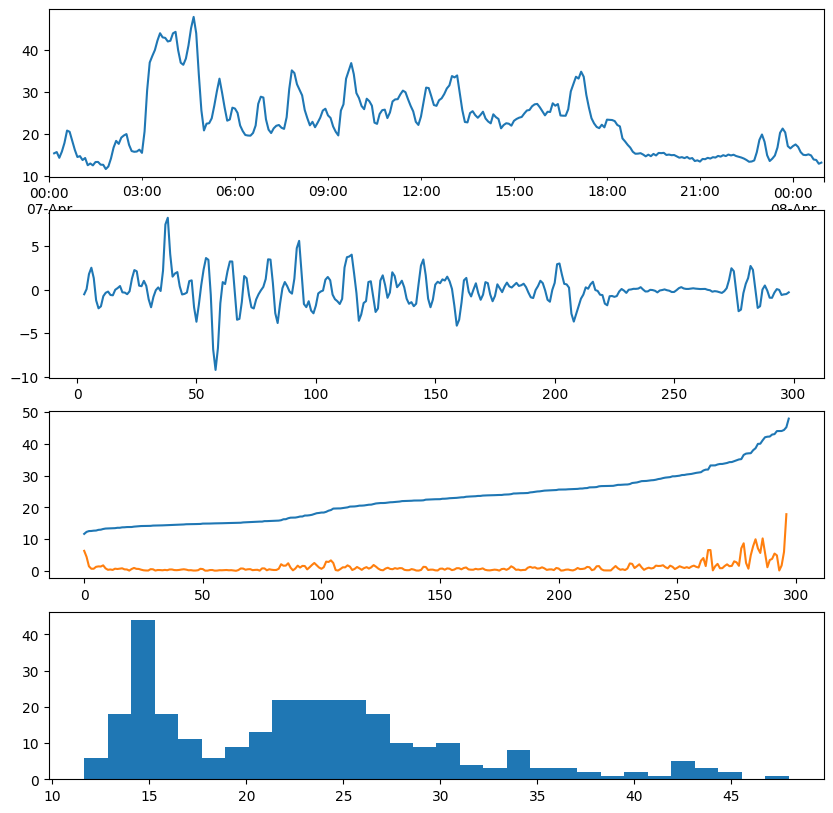

ANAYLISIS FOR PROJECT: 4d0c34f6-242f-4ce1-92bd-2a764b070941
Threshold: [array([5.20455232]), array([11.36815647])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


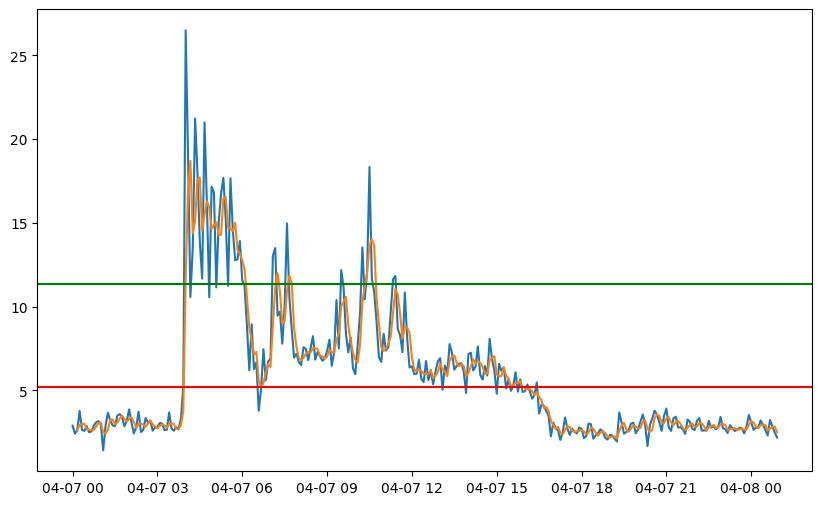

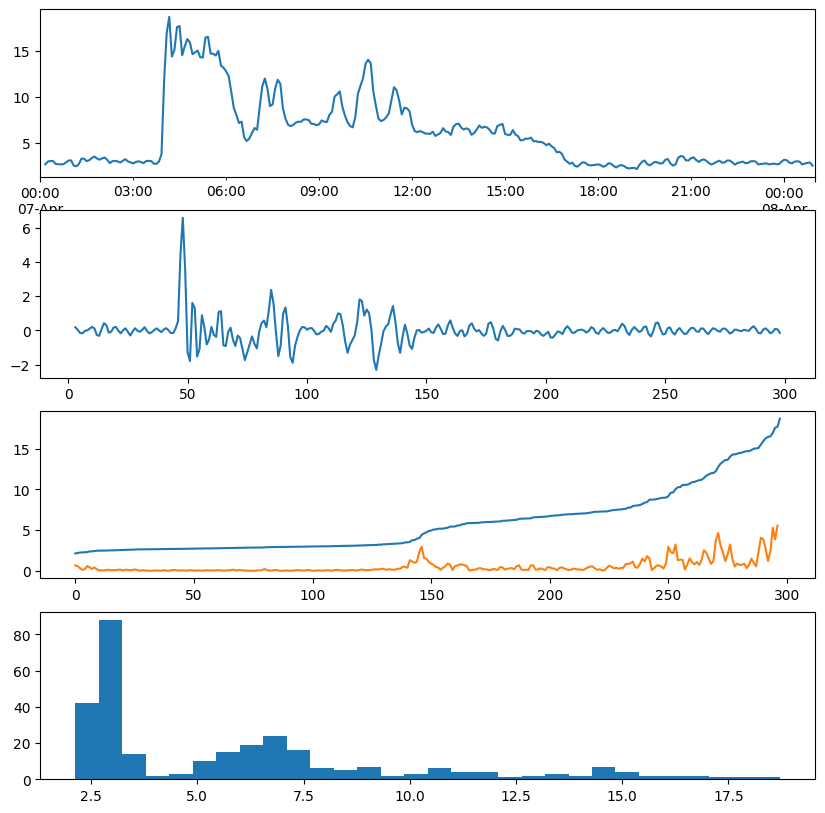

ANAYLISIS FOR PROJECT: ef351b6e-8cb7-43ed-9945-e3881a3cf228


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([3.59066349]), array([6.96350377])]


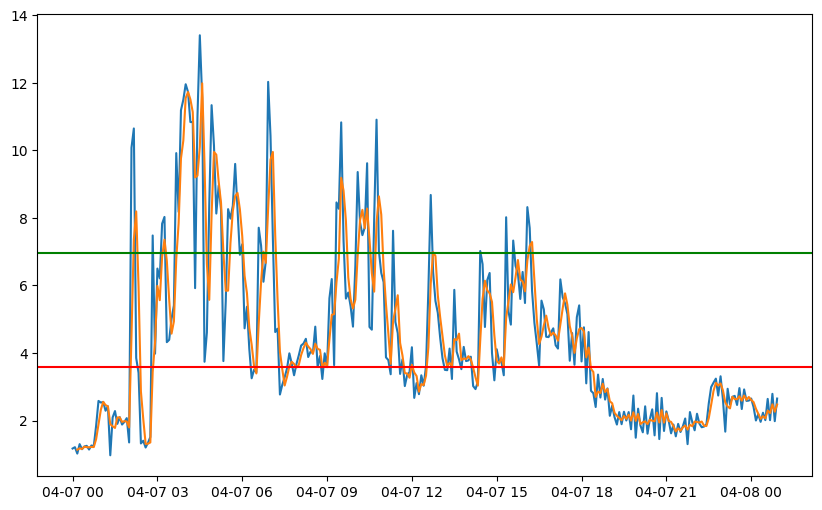

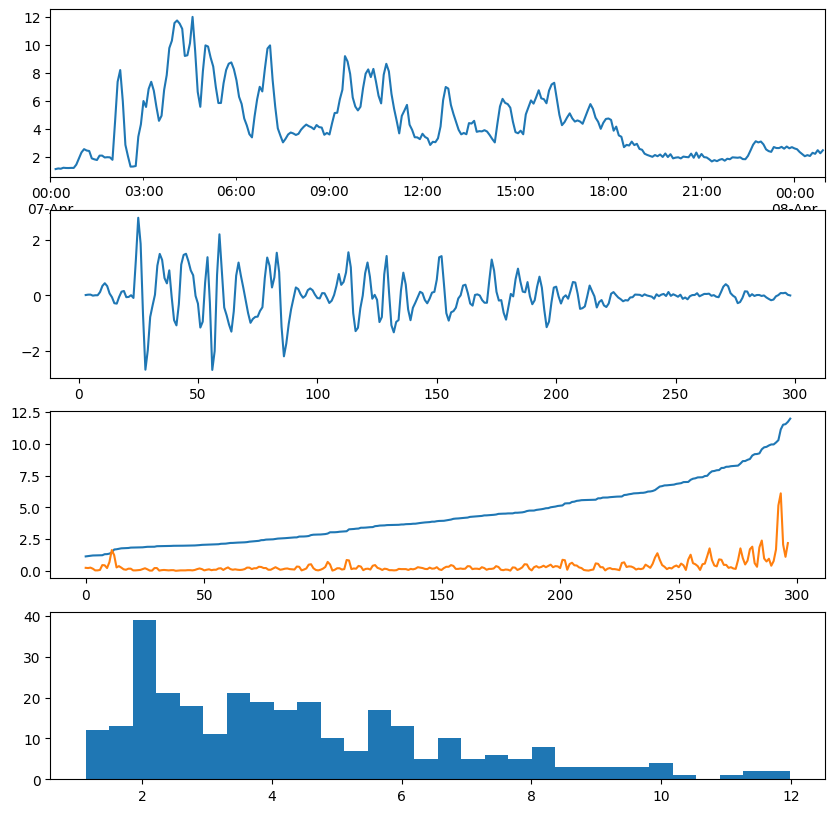

ANAYLISIS FOR PROJECT: 0bd2836e-ee9c-4130-8903-5450f0f5540d


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([6.75104296]), array([13.18892868])]


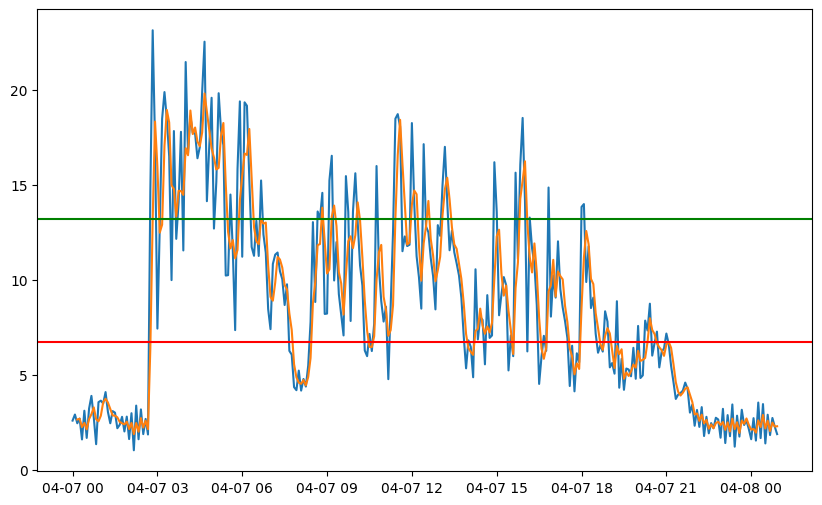

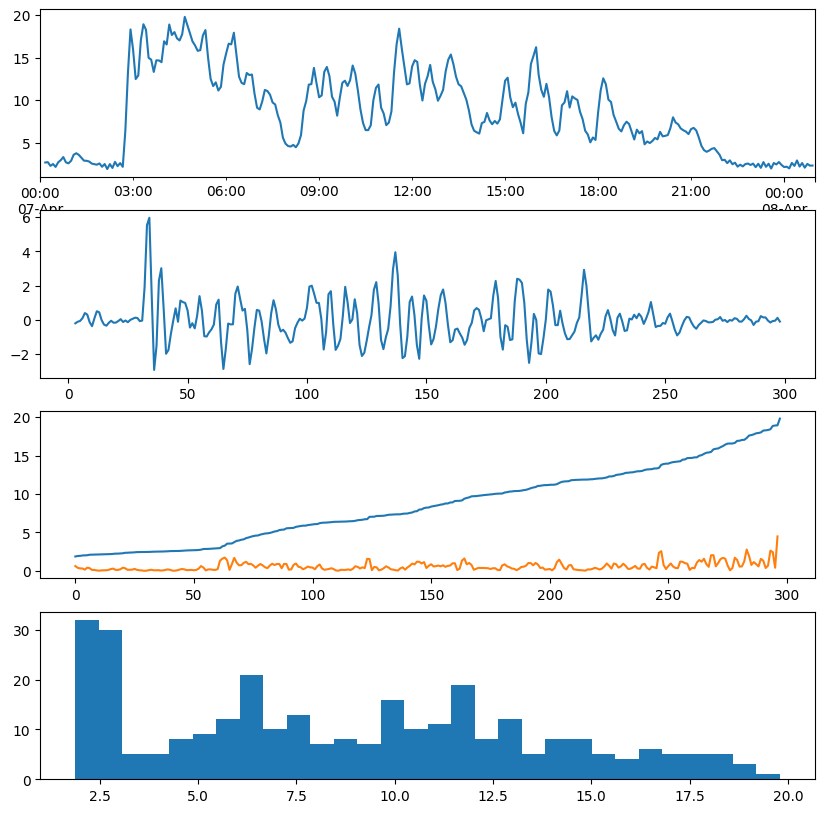

In [22]:

import pytz

def dt_to_ts(dt: datetime):
    return int(dt.timestamp())

def datetime_add_timezone(standard_datetime: datetime):
    # Convert to datetime64[ns, CET]
    cet_timezone = pytz.timezone('CET')
    datetime_cet = pd.to_datetime(standard_datetime, utc=True).tz_convert(cet_timezone)
    return datetime_cet

for project_id in projects:

    print(f'ANAYLISIS FOR PROJECT: {project_id}')

    analyze_day_offset = 0

    # Trigger everyday at 1.00 a.m.
    today = datetime.today()-timedelta(days=analyze_day_offset)
    analyze_day = datetime.today()-timedelta(days=analyze_day_offset+1)


    start_dt = datetime_add_timezone(analyze_day)
    end_dt = datetime_add_timezone(today)

    start_dt = start_dt.replace(hour = 0, minute = 0, second= 0, microsecond = 0)
    end_dt = end_dt.replace(hour = 1, minute = 0, second= 0, microsecond = 0)

    start_ts = int(start_dt.timestamp())
    end_ts = int(end_dt.timestamp())


    df = pd.DataFrame()

    data = fetch_data_from_http(v, project_id, start_ts, end_ts, "5m")
    df = append_data_to_dataframe_http(df, data, v)
    df = df.set_index("ts")

    # get load period

    # get the maximum of reference time
    closed_hours_max = df[df.index > end_dt-timedelta(hours=2)].max().iloc[0]
    closed_hours_mean = df[df.index > end_dt-timedelta(hours=2)].mean().iloc[0]
    closed_hours_std = df[df.index > end_dt-timedelta(hours=2)].std().iloc[0]


    # add the rolling mean
    df['Rolling Mean'] = df[v].rolling(window=3).mean()

    #th1 = get_th1(df)

    # get all observations which exceeded the threshold
    #open_period_df = df[df['Rolling Mean'] > th1]
    #operating_mean = open_period_df[v].mean()
    #operating_mean_roll = open_period_df["Rolling Mean"].mean()
    #operating_max_roll = open_period_df["Rolling Min"].mean()
    #operating_min_roll = open_period_df["Rolling Max"].mean()

    '''
    # set first observation as start and last as end
    #operation_start = load_start = open_period_df.index[0]
    #operation_stop = open_period_df.index[-1]

    # get load window
    #load_window_start = datetime_add_timezone(datetime.combine(start_dt, t_open) - timedelta(minutes=bake_window))
    #load_window_stop = datetime_add_timezone(datetime.combine(start_dt, t_open))

    #print(f"window start: {load_window_start}")
    #print(f"window close: {load_window_stop}")
    #print(f"operation start: {operation_start}")
    #print(f"operation start: {operation_stop}")


    #   the device should raise a warning alert, if
    #   the load process starts too late, < 1h before opening time

    load_delta_opening_minutes = (load_window_stop - load_start).total_seconds()/60

    print(f"load delta: {load_delta_opening_minutes} minutes")


    if load_delta_opening_minutes < 60:
        print(f"ALERT: load started to early by {abs(load_delta_opening_minutes)} minutes")

    #   the device should report the behaviour

    #   load process starts before the time window
    if load_window_start > load_start:
        print(f"load started before window!")

    #   load process starts after the time window
    elif load_start > load_window_stop:
        print(f"load started after window!")

    #   load process within the time window
    else:
        print(f"load started in Window!")

    #   TODO: load process starts before closing time, < 1h before closing

    load_periods = get_load_periods(open_period_df, th1)
    plot_backing_monitoring(operation_start, operation_stop, load_periods)
    

        

    print("-----------------------------------------------")
    '''
    plt.figure(figsize=(10, 6))
    ths = get_tresholds(df) 
    plt.plot(df)
    plt.axhline(y=ths[0], color='r', linestyle='-')
    plt.axhline(y=ths[1], color='g', linestyle='-')

    analyze_load_monitoring()
       

